In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from astropy.table import Table
from astropy.io import ascii
from astropy.io import fits

from astropy.coordinates import SkyCoord
from astropy import units

In [2]:
## Path and file of some WISE W4 data
path =   '/cos_pc19a_npr/data/SDSS/DR14Q/'
filename = 'DR14Q_pruned_repeats.csv'
datafile= path+filename

In [3]:
df = pd.read_csv(datafile)

In [4]:
df.columns

Index(['SDSS_NAME', 'RA', 'DEC', 'THING_ID', 'PLATE', 'MJD', 'FIBERID',
       'SPECTRO', 'Z', 'SOURCE_Z', 'Z_VI', 'Z_PIPE', 'Z_PIPE_ERR', 'ZWARNING',
       'Z_PCA', 'Z_PCA_ERR', 'Z_CIV_ERR', 'Z_CIII_ERR', 'Z_MGII', 'Z_MGII_ERR',
       'BOSS_TARGET1', 'ANCILLARY_TARGET1', 'ANCILLARY_TARGET2',
       'EBOSS_TARGET0', 'EBOSS_TARGET1', 'EBOSS_TARGET2', 'N_SPEC_SDSS',
       'N_SPEC_BOSS', 'N_SPEC', 'PLATE_DUPLICATE', 'MJD_DUPLICATE',
       'FIBERID_DUPLICATE', 'SPECTRO_DUPLICATE', 'BHWHM_CIV', 'RHWHM_CIV',
       'AMP_CIV', 'REWE_CIV', 'ERR_REWE_CIV', 'FWHM_CIII', 'BHWHM_CIII',
       'RHWHM_CIII', 'AMP_CIII', 'REWE_CIII', 'ERR_REWE_CIII', 'FWHM_MGII',
       'BHWHM_MGII', 'RHWHM_MGII', 'AMP_MGII', 'REWE_MGII', 'ERR_REWE_MGII',
       'FWHM_HB', 'BHWHM_HB', 'RHWHM_HB', 'AMP_HB', 'REWE_HB', 'ERR_REWE_HB',
       'FWHM_OIII4960', 'BHWHM_OIII4960', 'RHWHM_OIII4960', 'AMP_OIII4960',
       'REWE_OIII4960', 'ERR_REWE_OIII4960', 'FWHM_OIII5009', 'BHWHM_OIII5009',
       'RHWHM_OIII5009', 'AM

In [5]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [6]:
singles   = df[df["N_SPEC"] <2]
doubles   = df[df["N_SPEC"] ==2]
multiples = df[df["N_SPEC"] >2]
repeats   = df[df["N_SPEC"] >1]

In [7]:
print('No. of objects with:: '),
print('         a single spectra in the DR14Q is ', len(singles))
print('    more than one spectra in the DR14Q is ', len(repeats))
print('           double spectra in the DR14Q is ', len(doubles))
print('         multiple spectra in the DR14Q is ', len(multiples))

No. of objects with:: 
         a single spectra in the DR14Q is  0
    more than one spectra in the DR14Q is  7943
           double spectra in the DR14Q is  5404
         multiple spectra in the DR14Q is  2539


In [8]:
#print(multiples['N_SPEC'], multiples['MJD_DUPLICATE'])
for index, row in multiples.iterrows():
    print(row['MJD_DUPLICATE'])

(0, 56279, 0, 56539, 0, 56957, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1)
(0, 56243, 0, 56543, 0, 57328, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1)
(0, 52262, 0, 55447, 0, 57011, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1)
(0, 52262, 0, 55443, 0, 57006, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1)
(0, 52525, 0, 55443, 0, 57011, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -

(0, 56572, 0, 56576, 0, 56602, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1)
(0, 56273, 0, 56572, 0, 56602, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1)
(0, 56273, 0, 56572, 0, 56602, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1)
(0, 56273, 0, 56572, 0, 56602, 0, 57030, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1)
(0, 56273, 0, 56576, 0, 56602, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

In [9]:
print(type(multiples['N_SPEC']))
print(type(multiples['MJD_DUPLICATE']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


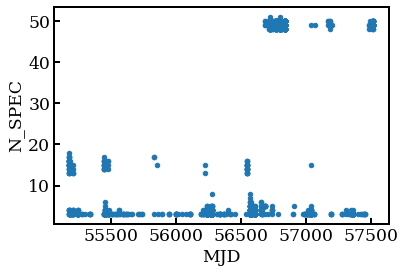

In [10]:
multiples.plot.scatter(x='MJD', y='N_SPEC')
plt.show()

In [11]:
multiples.plot.scatter(x='MJD', y='MJD_DUPLICATE')
#plt.show()

ValueError: scatter requires y column to be numeric

In [12]:
mjds = np.array(multiples['MJD_DUPLICATE'])
print(type(mjds))

<class 'numpy.ndarray'>


In [13]:
#plt.plot(mjds)
print((mjds[0]))
print(df['MJD_DUPLICATE'][0:][0:0])

(0, 56279, 0, 56539, 0, 56957, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1)
Series([], Name: MJD_DUPLICATE, dtype: object)


In [14]:
#b = mjds.astype(float)
df.convert_objects(convert_numeric=True)
#df['MJD_DUPLICATE'][0]

/Users/npr1/astroconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


,SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,SPECTRO,Z,SOURCE_Z,...,PH_FLAG,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR
0,000001.41+200044.1,0.005912,20.012258,287103247,6110,56279,86,BOSS,3.090,VI,...,-,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,000123.87+114323.0,0.349460,11.723073,216305543,6182,56190,696,BOSS,0.858,VI,...,-,1,3.465818e-31,3.040770e-32,4.893249e-31,5.879986e-32,4.687268e-31,6.313947e-32,7.908045e-31,7.394363e-32
2,000130.57+130847.3,0.377384,13.146475,228301152,5649,55912,558,BOSS,3.051,VI,...,-,1,5.235675e-32,2.697985e-32,1.831978e-31,4.046820e-32,5.646720e-32,4.565776e-32,1.861912e-31,5.266788e-32
3,000143.41+152021.4,0.430884,15.339289,246849314,6172,56269,304,BOSS,2.622,VI,...,-,1,1.084729e-30,3.277025e-32,9.761961e-31,4.655063e-32,3.737501e-31,3.836509e-32,4.396499e-31,5.252872e-32
4,000159.12-094712.5,0.496349,-9.786830,24390592,7167,56604,156,BOSS,2.321,VI,...,-,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,000219.66+213402.8,0.581931,21.567452,299191645,6171,56311,508,BOSS,2.387,VI,...,-,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,000220.64+250340.0,0.586041,25.061116,328881756,6513,56543,925,BOSS,2.773,VI,...,-,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,000225.69+213731.8,0.607058,21.625511,300929480,6879,56539,323,BOSS,2.597,VI,...,-,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,000228.09+175846.9,0.617062,17.979702,270114840,6207,56239,980,BOSS,1.568,VI,...,-,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,000239.38+172209.6,0.664097,17.369350,264897017,6172,56269,707,BOSS,2.701,VI,...,-,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [15]:
df['MJD_DUPLICATE'][0]

'(0, 56274, 0, 56957, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1)'

In [16]:
type(df['MJD_DUPLICATE'][0])

str

In [17]:
pd.to_numeric(df['MJD_DUPLICATE'], errors='coerce')

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
        ..
7913   NaN
7914   NaN
7915   NaN
7916   NaN
7917   NaN
7918   NaN
7919   NaN
7920   NaN
7921   NaN
7922   NaN
7923   NaN
7924   NaN
7925   NaN
7926   NaN
7927   NaN
7928   NaN
7929   NaN
7930   NaN
7931   NaN
7932   NaN
7933   NaN
7934   NaN
7935   NaN
7936   NaN
7937   NaN
7938   NaN
7939   NaN
7940   NaN
7941   NaN
7942   NaN
Name: MJD_DUPLICATE, Length: 7943, dtype: float64

In [ ]:
for i in range(len(mjds)):
    mjds[i] = [float(x) for x in mjds[i]]

In [ ]:
print(type(df))
print(type(df['MJD_DUPLICATE']))
print(df['MJD_DUPLICATE'])

In [ ]:
#df = df.astype(float)
#df.dtypes

In [ ]:
def f(thing):
        thing = thing.strip()
        thing = thing.replace('(', '')
        thing = thing.replace(')', '')
        thing = thing.split(',')
        return tuple(float(n) for n in thing)

In [ ]:
converted = df['MJD_DUPLICATE'].apply(f)
df['MJD_DUPLICATE'] = converted

In [ ]:
type(converted)

In [ ]:
#df

In [ ]:
#df['MJD_DUPLICATE_float'] = df['MJD_DUPLICATE'].astype(float)

In [ ]:
converted.plot.line()
plt.show()

In [ ]:

#multiples.plot.scatter(x='MJD', y='MJD_DUPLICATE')
plt.show()